# 2-Dimensional Thyroid Hormone Regulation Model
_Implmentation of [Yang et al. 2021](https://pubmed.ncbi.nlm.nih.gov/34358537/)_

### Variable Definitions:
 - $U$: euthyroid set point of FT4
 - $\text{TSH}(t)$: plasma concentration of TSH (mU/L)
 - $\text{FT4}(t)$: plasma concentration FT4 (pg/mL)
 - $d_1$, $d_2$: TSH, FT4 auto-proportional decay rate
 - $p_1$: default release rate of TSH... $f(U)=p_1$
 - $p_2(t)$: time dependent FT4 synthesis factor
 - $\frac{1}{s_2+\text{TSH}}$: TSH receptor binding term
 - $f(\text{FT4})$: TSH secretion dependent on FT4
    - $f(\text{FT4}) = p_1 - \frac{p_1(\text{FT4}-U)}{s_1+\text{FT4}} = p_1\frac{s_1+U}{s_1+\text{FT4}}$
 - $G$: Treatment dependent variable, potentially also time dependent

### ODEs
1. $\frac{\text{dTSH}(t)}{\text{d}t} = p_1 - \frac{p_1(\text{FT4}-U)}{s_1+\text{FT4}} - d_1\text{TSH}$<br><br>
2. $\frac{\text{dFT4}(t)}{\text{d}t} = \frac{p_2(t)\text{TSH}}{s_2+\text{TSH}}-d_2\text{FT4}+G$<br><br>

In [1]:
using DifferentialEquations
using Plots

In [2]:
#Initialize parameters

function initialize_Fig2()

    U= 12.5e-6 #1
    TSH_0= 30e-3 #2
    FT4_0= 1e-6 #3
    d1= 1/16.6355 #4
    d2= 1/0.099021 #5
    s1= 0.0434e-6 #6
    s2= 0.0021e-3 #7
    p1= 50e-3 #8
    p2= d2*U*(1+(d1*s2)/p1) #9

    ICs= [U,TSH_0,FT4_0,d1,d2,s1,s2,p1,p2]

end

function euthyroid_model!(d,ICs,p,t)

    d[2]= ICs[8]-(ICs[8]*(ICs[3]-ICs[1]))-ICs[4]*ICs[2] #TSH
    d[3]= (ICs[8]*ICs[2])/(ICs[7]+ICs[2])-ICs[5]*ICs[3] #FT4

end



euthyroid_model! (generic function with 1 method)

In [3]:
#Euthyroid State: p2=d2U(1+(d1s2/p1)) constant, G=0

u0 = initialize_Fig2()
tspan = (0.0,100.0)
prob = ODEProblem(euthyroid_model!,u0,tspan)
sol = solve(prob,saveat=1)


retcode: Success
Interpolation: 1st order linear
t: 101-element Vector{Float64}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
   ⋮
  92.0
  93.0
  94.0
  95.0
  96.0
  97.0
  98.0
  99.0
 100.0
u: 101-element Vector{Vector{Float64}}:
 [1.25e-5, 0.03, 1.0e-6, 0.060112410207087255, 10.098867916906515, 4.34e-8, 2.1e-6, 0.05, 0.00012623616767165917]
 [1.25e-5, 0.07656018785138885, 0.004950717332589936, 0.060112410207087255, 10.098867916906515, 4.34e-8, 2.1e-6, 0.05, 0.00012623616767165917]
 [1.25e-5, 0.12038077582900612, 0.004951279350879447, 0.060112410207087255, 10.098867916906515, 4.34e-8, 2.1e-6, 0.05, 0.00012623616767165917]
 [1.25e-5, 0.1616448659922143, 0.004962836970348124, 0.060112410207087255, 10.098867916906515, 4.34e-8, 2.1e-6, 0.05, 0.00012623616767165917]
 [1.25e-5, 0.2005014569987367, 0.0049543095808645375, 0.060112410207087255, 10.098867916906515, 4.34e-8, 2.1e-6, 0.05, 0.00012623616767165917]
 [1.25e-5, 0.23709114035397644, 0.00495387228245404, 0.0

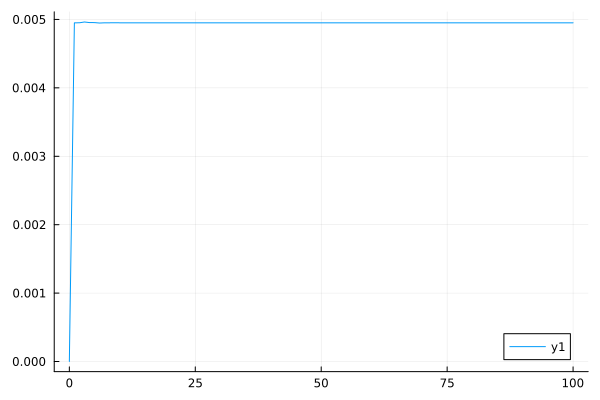

In [4]:
plot(sol.t,sol[3,:])

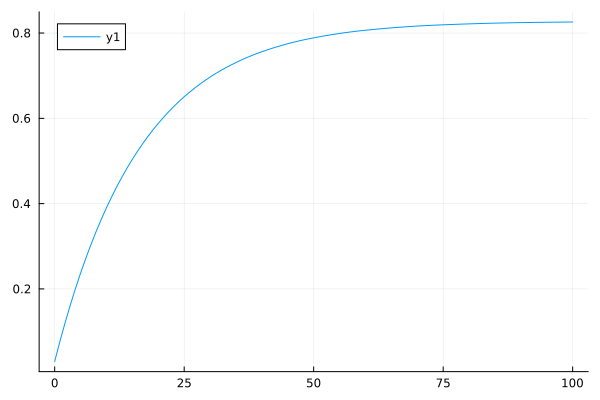

In [5]:
plot(sol.t,sol[2,:])